# PRODUCTION RUN FOR PREDICTING SALES PRICES USING KAGGLE'S TEST DATA FILE

# Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


# setting some parameters
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

# Importing data

In [2]:
#Load in the Kaggle test set
kaggle_testset_df = pd.read_csv('../datasets/test.csv')
print(kaggle_testset_df.shape)
kaggle_testset_df.head()

(879, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [3]:
# Load in the production data
prod_df = pd.read_csv('../datasets/prod_df.csv')
print(prod_df.shape)
prod_df.head()

(1646, 27)


,OverallQual,ExterQual,KitchenQual,GrLivArea,fe_Age,BsmtQual,GarageArea,GarageFinish,TotalBsmtSF,1stFlrSF,FullBath,HeatingQC,FireplaceQu,Exterior1st_VinylSd,MSSubClass_60,GarageType_Detchd,BsmtFinType1,Foundation_CBlock,Neighborhood_NridgHt,MSZoning_RM,LotShape,MasVnrType_Stone,MSSubClass_30,Foundation_BrkTil,MasVnrType_BrkFace,GarageType_None,SalePrice
0,6,4,4,1479,44,4,475.0,3,725.0,725,2,5,1,0,1,0,7,1,0,0,3,0,0,0,1,0,130500
1,7,4,4,2122,24,5,559.0,3,913.0,913,2,5,4,1,1,0,7,0,0,0,3,0,0,0,1,0,220000
2,5,3,4,1057,67,4,246.0,2,1057.0,1057,1,3,1,1,0,1,7,1,0,0,4,0,0,0,0,0,109000
3,5,3,3,1444,14,5,400.0,4,384.0,744,2,4,1,1,1,0,2,0,0,0,4,0,0,0,0,0,174000
4,6,3,3,1445,120,3,484.0,2,676.0,831,2,3,1,0,0,1,2,0,0,0,3,0,0,0,0,0,138500


In [4]:
# getting some data from code file 01_EDA and Cleaning.ipynb

cat_nominal_feat_list = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'SaleType']
cat_ordinal_feat_list = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
cat_feat_list = cat_nominal_feat_list + cat_ordinal_feat_list
num_continuous_feat_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
num_discrete_feat_list = ['YearBuilt', 'YearRemod/Add', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
num_feat_list = num_discrete_feat_list + num_continuous_feat_list

## Data Cleaning

### Fix names of the columns

In [5]:
# function to remove spaces from column name
def clean_col_name(data):
    for old in data.columns:
        new = old.replace(" ","")
        data.rename(columns={old : new}, inplace=True)

In [6]:
clean_col_name(kaggle_testset_df)
kaggle_testset_df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

### Exploring obvious features to drop

Here we search for features where the number of records is too low as compared to the whole population and feature that we can tell intuitively that it does not give any meaningful insights.

In [7]:
kaggle_testset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             879 non-null    int64  
 1   PID            879 non-null    int64  
 2   MSSubClass     879 non-null    int64  
 3   MSZoning       879 non-null    object 
 4   LotFrontage    719 non-null    float64
 5   LotArea        879 non-null    int64  
 6   Street         879 non-null    object 
 7   Alley          58 non-null     object 
 8   LotShape       879 non-null    object 
 9   LandContour    879 non-null    object 
 10  Utilities      879 non-null    object 
 11  LotConfig      879 non-null    object 
 12  LandSlope      879 non-null    object 
 13  Neighborhood   879 non-null    object 
 14  Condition1     879 non-null    object 
 15  Condition2     879 non-null    object 
 16  BldgType       879 non-null    object 
 17  HouseStyle     879 non-null    object 
 18  OverallQua

**Observation**

From the above information, we can see that some features will not be relevant in our exploratory analysis as there are too many missing values. Plus there are so many features to analyse that it may be better to concentrate on the ones which can give us real insights. Thus, at 879 total records, 50% would be 440 records, so any feature less than 440 rows can be dropped (such as `Alley`, `PoolQC`, `Fence`, `MiscFeature`).

We will also remove `PID` as they do not offer any insights.

**Note:** Cross checking these identified features against the data dictionary file, we can see that these features may not be present on all houses (which explains the `NaN` values).

In [8]:
# drop PID column as they do not offer any insights
# Note: cannot drop Id column as we need it for submission
del kaggle_testset_df['PID']
try: # if it exist
    cat_feat_list.remove('PID') # update list
    cat_nominal_feat_list.remove('PID') # update list
except:
    print("do not exist, all good")

do not exist, all good


In [9]:
# filtering out data that we want to keep for next step (aka dropping features with less than 50% records)
kaggle_testset_df_clean = kaggle_testset_df[[column for column in kaggle_testset_df \
                          if kaggle_testset_df[column].count() / len(kaggle_testset_df) >= 0.5]]

print("List of dropped columns:", end=" ")
for c in kaggle_testset_df.columns:
    if c not in kaggle_testset_df_clean.columns:
        print(c, end=", ")
print('\n')
# assign the 1st cleansing dataframe back to original name
kaggle_testset_df = kaggle_testset_df_clean

List of dropped columns: Alley, PoolQC, Fence, MiscFeature, 



In [10]:
# update list
remove_list = ["Alley", "MiscFeature", "PoolQC", "Fence"]

list_to_update = [cat_nominal_feat_list, cat_ordinal_feat_list, num_continuous_feat_list,
                  num_discrete_feat_list]
for each in remove_list:
    for eachlist in list_to_update:
        if each in eachlist:
            eachlist.remove(each)
            print("removed", each)

In [11]:
kaggle_testset_df.shape

(879, 75)

### Fix NaN values

Expectation for Kaggle submisison is exactly 879 rows in the test data. Therefore we will not be dropping any rows due to NaN but will find logical ways to impute them with some values.

In [12]:
kaggle_testset_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      160
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemod/Add      0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          25
BsmtCond          25
BsmtExposure      25
BsmtFinType1      25
BsmtFinSF1         0
BsmtFinType2      25
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

**Observation**

We compare the above features with NaN against the data dictionay and found that some of these features with NaN actually mean something other than just a blank value. For these features, we will treat them differently by imputing the correct values before filling all remaining NaN with zeros. These features and their respective treatment are:

Note: This is first logical cleaning, as we go thru EDA we may have to change the treatment for some.

**1. Impute with "None" because NaN literally mean None or do not have that feature**
- MasVnrType - impute NaN with None (None)
- BsmtQual - impute NaN with None (No basement)
- BsmtCond - impute NaN with None (No basement)
- BsmtExposure - impute NaN with None (No basement)
- BsmtFinType1 - impute NaN with None (No basement)
- BsmtFinType2 - impute NaN with None (No basement)
- FireplaceQu - impute NaN with None (No fireplace)
- GarageType - impute NaN with None (No garage)
- GarageFinish - impute NaN with None (No garage)
- GarageQual - impute NaN with None (No garage)
- GarageCond - impute NaN with None (No garage)

**2. Impute with Logical assumption of value**
- LotFrontage - impute with mean of population
- MasVnrArea - impute with 0
- Electrical - impute with mode SBrkr
- GarageYrBlt - comparing with other garage related features showed that they were all zero or None. Thus safe to assume there is no garage and a logical value will be the year the house was built since this cannot be a zero value.

In [13]:
# 1. Impute with "None" because NaN literally mean None or do not have that feature
nan_list = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for n in nan_list:
    kaggle_testset_df[n].where(kaggle_testset_df[n].notnull(), "None", inplace=True)

160


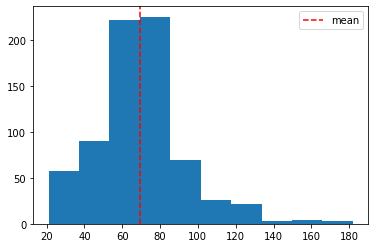

In [14]:
# 2. Impute with Logical assumption of value
# LotFrontage - (Continuous): Linear feet of street connected to property
# 160 NaN 
print(kaggle_testset_df.LotFrontage.isnull().sum())
plt.hist(x="LotFrontage", data=kaggle_testset_df);
plt.axvline(kaggle_testset_df.LotFrontage.mean(),0, ls='--', color='r', label="mean")
plt.legend()
# continuous variable and a skewed distribution. Impute with mean of population.
kaggle_testset_df.LotFrontage.fillna(kaggle_testset_df.LotFrontage.mean(), axis=0, inplace=True)

1


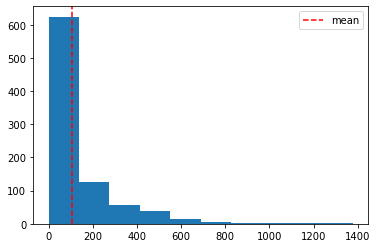

In [15]:
# 2. Impute with Logical assumption of value
# MasVnrArea - Mas Vnr Area (Continuous): Masonry veneer area in square feet
# 1 NaN
print(kaggle_testset_df.MasVnrArea.isnull().sum())
plt.hist(x="MasVnrArea", data=kaggle_testset_df);
plt.axvline(kaggle_testset_df.MasVnrArea.mean(),0, ls='--', color='r', label="mean")
plt.legend()
# continuous variable. High frequency between 0 to 200, having 1 more is not a big difference
# Impute with 0
kaggle_testset_df.MasVnrArea.fillna(0, axis=0, inplace=True)

1


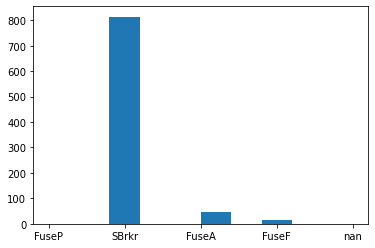

In [16]:
# Electrical - Electrical (Ordinal): Electrical system
# 1 NaN
print(kaggle_testset_df.Electrical.isnull().sum())
plt.hist(x="Electrical", data=kaggle_testset_df);
# ordinal variable, High frequency for SBrkr, having 1 more is not a big difference
# impute with the mode SBrkr
kaggle_testset_df.Electrical.fillna("SBrkr", axis=0, inplace=True)

45


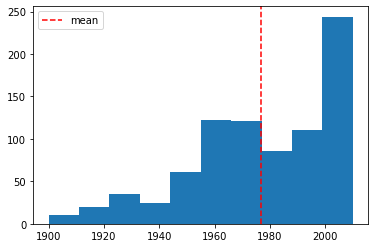

In [17]:
# 3. Impute with Logical assumption of value
# 45 NaN
print(kaggle_testset_df.GarageYrBlt.isnull().sum())
# distribution before impute
plt.hist(x="GarageYrBlt", data=kaggle_testset_df);
plt.axvline(kaggle_testset_df.GarageYrBlt.mean(),0, ls='--', color='r', label="mean")
plt.legend();

In [18]:
# discrete variable, comparing with other garage related features show that they were all zero or None,
# except for 1 where garage is detached. Thus safe to assume there is no garage and a logical value will
# be the year the house was built
kaggle_testset_df.loc[kaggle_testset_df.GarageYrBlt.isnull(), ['GarageYrBlt', 'GarageCars', 'GarageCars',
                                                               'GarageType', 'GarageCond', 'GarageFinish',
                                                               'GarageQual', 'GarageArea', 'YearBuilt']]

,GarageYrBlt,GarageCars,GarageCars,GarageType,GarageCond,GarageFinish,GarageQual,GarageArea,YearBuilt
29,NaN,0.0,0.0,None,None,None,None,0.0,1945
45,NaN,0.0,0.0,None,None,None,None,0.0,1970
66,NaN,0.0,0.0,None,None,None,None,0.0,1971
68,NaN,0.0,0.0,None,None,None,None,0.0,1931
106,NaN,0.0,0.0,None,None,None,None,0.0,1945
110,NaN,0.0,0.0,None,None,None,None,0.0,1967
114,NaN,0.0,0.0,None,None,None,None,0.0,2006
145,NaN,0.0,0.0,None,None,None,None,0.0,1947
153,NaN,0.0,0.0,None,None,None,None,0.0,1920
157,NaN,0.0,0.0,None,None,None,None,0.0,1970


45


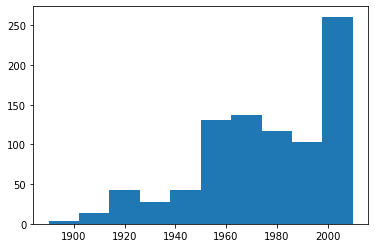

In [19]:
print(kaggle_testset_df.GarageYrBlt.isnull().sum())
# impute with YearBuilt
kaggle_testset_df.loc[kaggle_testset_df.GarageYrBlt.isnull(), ['GarageYrBlt']]=kaggle_testset_df.YearBuilt
# distribution after impute not much difference
plt.hist(x="GarageYrBlt", data=kaggle_testset_df);

In [20]:
# confirming all NaN is filled with 0
print(kaggle_testset_df.shape)
kaggle_testset_df.isnull().sum()

(879, 75)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemod/Add    0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Fix categorical ordinal data values

Here we refer to the data dictionary and found that some of the categorical ordinal features contain values that actually indicate a specific order or their values would trigger a different intepretation in pandas (e.g. 'N' will be interpreted as NaN). Thus, we need to do this step before treating the NaN as a whole.

We altered these values in the dataframe accordingly in order for these to be process properly as ordinals in subsequent steps. These features were:

`Lotshape`, `GarageFinish`, `GarageQual`, `LandSlope`, `ExterCond`, `ExterQual`, `BsmtCond`, `BsmtQual`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `KitchenQual`, `FireplaceQu`, `Functional`, `CentralAir`, `PavedDrive`

In [21]:
# change values of ordinal features according to data dict
kaggle_testset_df["LotShape"].replace(["Reg", "IR1", "IR2", "IR3"], [4,3,2,1], inplace=True)
kaggle_testset_df["GarageFinish"].replace(["Fin", "RFn", "Unf", "None"], [4,3,2,1], inplace=True)
kaggle_testset_df["GarageQual"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1], inplace=True)
kaggle_testset_df["GarageCond"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1], inplace=True)
kaggle_testset_df["LandSlope"].replace(["Gtl", "Mod", "Sev"], [3,2,1], inplace=True)
kaggle_testset_df["ExterCond"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
kaggle_testset_df["ExterQual"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
kaggle_testset_df["BsmtCond"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1,], inplace=True)
kaggle_testset_df["BsmtQual"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1,], inplace=True)
kaggle_testset_df["BsmtExposure"].replace(["Gd", "Av", "Mn", "No", "None"], [5,4,3,2,1], inplace=True)
kaggle_testset_df["BsmtFinType1"].replace(["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "None"], [7,6,5,4,3,2,1], inplace=True)
kaggle_testset_df["BsmtFinType2"].replace(["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf", "None"], [7,6,5,4,3,2,1], inplace=True)
kaggle_testset_df["HeatingQC"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
kaggle_testset_df["KitchenQual"].replace(["Ex", "Gd", "TA", "Fa", "Po"], [5,4,3,2,1], inplace=True)
kaggle_testset_df["FireplaceQu"].replace(["Ex", "Gd", "TA", "Fa", "Po", "None"], [6,5,4,3,2,1,], inplace=True)
kaggle_testset_df["Functional"].replace(["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"], [8,7,6,5,4,3,2,1,], inplace=True)
kaggle_testset_df["Electrical"].replace(["SBrkr", "FuseA", "FuseF", "FuseP", "Mix"], [5,4,3,2,1,], inplace=True)
kaggle_testset_df["Utilities"].replace(["AllPub", "NoSewr", "NoSeWa", "ELO"], [4,3,2,1,], inplace=True)

# PavedDrive - change Y, P, N to Paved, Partial, DirtGravel respectively because pandas treat N as NaN
kaggle_testset_df["PavedDrive"].replace(["Y", "P", "N"], [3,2,1], inplace=True)

# CentralAir - mapping 1/0 to Y/N on features with Yes/No bias
kaggle_testset_df["CentralAir"] = kaggle_testset_df["CentralAir"].map({'Y':1, 'N':0})

In [22]:
# confirm that all ordinal features with implied order are fixed
# and those without implied order are left alone
for e in cat_ordinal_feat_list:
    print(e, kaggle_testset_df[e].unique())

LotShape [4 3 1 2]
Utilities [4 3]
LandSlope [3 2 1]
OverallQual [ 6  5  7  4  8  3 10  9  2]
OverallCond [8 4 5 6 7 9 3 2 1]
ExterQual [3 4 2 5]
ExterCond [2 3 4 5 1]
BsmtQual [3 5 4 6 1 2]
BsmtCond [4 5 1 3]
BsmtExposure [2 4 1 3 5]
BsmtFinType1 [2 7 5 4 6 1 3]
BsmtFinType2 [2 3 1 6 7 4 5]
HeatingQC [4 3 5 2]
Electrical [2 5 4 3]
KitchenQual [2 3 4 5 1]
Functional [8 6 7 5 4 3]
FireplaceQu [1 5 3 4 2 6]
GarageFinish [2 4 3 1]
GarageQual [2 4 3 1 5]
GarageCond [2 4 1 3 5 6]
PavedDrive [3 1 2]


### Fix datatypes

In [23]:
def datatype_checker(dataframe):
    cat_count=0
    num_count=0
    df_cat_feat_list = []
    df_num_feat_list = []
    for c in dataframe:
        if dataframe[c].dtypes=="object":
            df_cat_feat_list.append(c)
            cat_count+=1
            if c not in cat_feat_list:
                print("dataframe is Cat feature object but data dict is not", c)
        elif dataframe[c].dtypes=="int64" or dataframe[c].dtypes=="float64":
            df_num_feat_list.append(c)
            num_count+=1
            if c not in num_feat_list:
                print("dataframe is Num feature int/float but data dict is not", c)
#    print("")
#    print("total categorical object type in dataframe", cat_count)
#    print(df_cat_feat_list)
#    print("")
#    print("total categorical nominal type in dataframe", num_count)
#    print(df_num_feat_list)

In [24]:
datatype_checker(kaggle_testset_df)

dataframe is Num feature int/float but data dict is not Id
dataframe is Num feature int/float but data dict is not MSSubClass
dataframe is Num feature int/float but data dict is not LotShape
dataframe is Num feature int/float but data dict is not Utilities
dataframe is Num feature int/float but data dict is not LandSlope
dataframe is Num feature int/float but data dict is not OverallQual
dataframe is Num feature int/float but data dict is not OverallCond
dataframe is Num feature int/float but data dict is not ExterQual
dataframe is Num feature int/float but data dict is not ExterCond
dataframe is Num feature int/float but data dict is not BsmtQual
dataframe is Num feature int/float but data dict is not BsmtCond
dataframe is Num feature int/float but data dict is not BsmtExposure
dataframe is Num feature int/float but data dict is not BsmtFinType1
dataframe is Num feature int/float but data dict is not BsmtFinType2
dataframe is Num feature int/float but data dict is not HeatingQC
datafr

In [25]:
kaggle_testset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType
0,2658,190,RM,69.000000,9142,Pave,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,3,4,2,2,0.0,2,0.0,1020.0,1020.0,GasA,4,0,2,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,8,0,1,Detchd,1910.0,2,1.0,440.0,2,2,3,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,RL,69.630042,9662,Pave,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,5,4,2,2,0.0,2,0.0,1967.0,1967.0,GasA,3,1,5,1967,0,0,1967,0.0,0.0,2,0,6,2,3,10,8,0,1,Attchd,1977.0,4,2.0,580.0,4,4,3,170,0,0,0,0,0,0,8,2006,WD
2,2414,60,RL,58.000000,17104,Pave,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,5,5,4,7,554.0,2,0.0,100.0,654.0,GasA,5,1,5,664,832,0,1496,1.0,0.0,2,1,3,1,4,7,8,1,5,Attchd,2006.0,3,2.0,426.0,4,4,3,100,24,0,0,0,0,0,9,2006,New
3,1989,30,RM,60.000000,8520,Pave,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,4,4,2,2,0.0,2,0.0,968.0,968.0,GasA,3,1,5,968,0,0,968,0.0,0.0,1,0,2,1,3,5,8,0,1,Detchd,1935.0,2,2.0,480.0,3,4,1,0,0,184,0,0,0,0,7,2007,WD
4,625,20,RL,69.630042,9500,Pave,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,5,4,2,5,609.0,2,0.0,785.0,1394.0,GasA,4,1,5,1394,0,0,1394,1.0,0.0,1,1,3,1,3,6,8,2,5,Attchd,1963.0,3,2.0,514.0,4,4,3,0,76,0,0,185,0,0,7,2009,WD


**Observation**

From above we discovered that `MSSubClass` was actually categorical according to data dictionary, we re-typed this to `object` so get_dummies encoding will work later.

As for the rest, they were catergorical ordinal features that were imputed with numerals according to their implied ranking or Y/N meaning in data dictionary. As a result of this, their datatypes were changed to int/float. We do not need to address these as this was done to ensure that encoding works fine later on.

In [26]:
# re-type MSSubClass
kaggle_testset_df["MSSubClass"] = kaggle_testset_df["MSSubClass"].astype("object")

## Feature engineering test data

From the production modelling step, we noted that on fe_Age , one of the two engineered features survived the cut so we will re-create this feature and let .get_dummies handle the rest before we eventually trim the features down to only those selected for production.

In [27]:
# create new fe_Age column, assign values and drop original
kaggle_testset_df["fe_Age"] = 2020 - kaggle_testset_df["YearBuilt"]
kaggle_testset_df.drop("YearBuilt", axis=1, inplace=True)
#check and confirm
kaggle_testset_df[["fe_Age"]].head()

,fe_Age
0,110
1,43
2,14
3,97
4,57


In [28]:
# One-Hot encoding on Categorical Nominal features with .get_dummies
kaggle_testset_df = pd.get_dummies(kaggle_testset_df)
print(kaggle_testset_df.shape)

(879, 213)


In [29]:
# dropping features that are not required by the production model
# generate list of features to drop
drop_list = [f for f in kaggle_testset_df.columns if f not in prod_df.columns]
print("dropping", len(drop_list))

# drop the features
final_kaggle_testset_df = kaggle_testset_df.drop(columns=drop_list)

dropping 187


In [30]:
# re-ordering model dataframe columns to be in same sequence as testdata dataframe
# convert column names in the sequence we need to a list
sequence_list = final_kaggle_testset_df.columns.tolist()
sequence_list.append("SalePrice") # need to add back saleprice for training the model
print(sequence_list)
final_kaggle_testset_df.head(2)

['LotShape', 'OverallQual', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'fe_Age', 'MSSubClass_30', 'MSSubClass_60', 'MSZoning_RM', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock', 'GarageType_Detchd', 'GarageType_None', 'SalePrice']


,LotShape,OverallQual,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageFinish,GarageArea,fe_Age,MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,Exterior1st_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,GarageType_Detchd,GarageType_None
0,4,6,3,3,2,1020.0,4,908,1928,2,2,1,2,440.0,110,0,0,1,0,0,0,0,0,0,1,0
1,3,5,3,5,2,1967.0,3,1967,1967,2,3,1,4,580.0,43,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# re-align production model column sequence to be the same as final kaggle test df
prod_df = prod_df[sequence_list]
prod_df.head(2)

,LotShape,OverallQual,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageFinish,GarageArea,fe_Age,MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,Exterior1st_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,GarageType_Detchd,GarageType_None,SalePrice
0,3,6,4,4,7,725.0,5,725,1479,2,4,1,3,475.0,44,0,1,0,0,0,1,0,0,1,0,0,130500
1,3,7,4,5,7,913.0,5,913,2122,2,4,4,3,559.0,24,0,1,0,0,1,1,0,0,0,0,0,220000


### Final Kaggle's test data after clean up look like this

In [32]:
print(final_kaggle_testset_df.shape)
final_kaggle_testset_df

(879, 26)


,LotShape,OverallQual,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageFinish,GarageArea,fe_Age,MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,Exterior1st_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,GarageType_Detchd,GarageType_None
0,4,6,3,3,2,1020.0,4,908,1928,2,2,1,2,440.0,110,0,0,1,0,0,0,0,0,0,1,0
1,3,5,3,5,2,1967.0,3,1967,1967,2,3,1,4,580.0,43,0,0,0,0,0,0,0,0,1,0,0
2,3,7,4,5,7,654.0,5,664,1496,2,4,5,3,426.0,14,0,1,0,0,1,0,0,0,0,0,0
3,4,5,4,4,2,968.0,3,968,968,1,3,1,2,480.0,97,1,0,1,0,0,0,0,0,1,1,0
4,3,6,3,5,5,1394.0,4,1394,1394,1,3,5,3,514.0,57,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,4,6,3,4,6,1084.0,3,1084,1877,2,3,4,2,488.0,46,0,1,0,0,0,0,0,0,1,0,0
875,4,6,4,4,5,1104.0,5,1104,1988,2,4,5,3,480.0,54,0,1,0,0,1,1,0,0,1,0,0
876,4,5,3,4,5,952.0,5,1211,1211,1,3,4,2,322.0,52,0,0,0,0,0,0,0,0,1,0,0
877,4,4,3,4,6,864.0,3,864,864,1,3,1,2,528.0,49,0,0,0,0,0,0,0,0,0,1,0


# Generate predictions from Kaggle's test data

Here we begin to train the production model with the train data and proceed to generate predictions using the test data.

In [33]:
print(prod_df.shape)
print(final_kaggle_testset_df.shape)

(1646, 27)
(879, 26)


## Fit and Train production model

In [34]:
# set X and y
X = prod_df.drop("SalePrice", axis=1, inplace=False) 
y = prod_df["SalePrice"]

# Instantiate
ss = StandardScaler()
prod_model = Lasso(alpha = 248.003082217939) # optimal alpha

# Applies StandardScaler normalization to whole training set
X_scaled = ss.fit_transform(X)

# transform kaggle's testdata to same para of X_scaled in the model
testdata = final_kaggle_testset_df
X_testdata_scaled = ss.transform(testdata)

# Re-fits the model
prod_model.fit(X_scaled, y)

#Scores the model (training data set)
prod_model_scores = prod_model.score(X_scaled, y)
print("Production Model(Lasso) R2", prod_model_scores)
print("Production Model(Lasso) RMSE " + str(np.sqrt(mean_squared_error(y, prod_model.predict(X_scaled)))))

Production Model(Lasso) R2 0.8627181873174974
Production Model(Lasso) RMSE 21636.537887176306


## Extract model predictions

In [35]:
# generating predictions with test data
#testdata = kaggle_testset_model_df
predictions = prod_model.predict(X_testdata_scaled)
predictions

array([138118.55775542, 191695.68181722, 207858.69995899, 110683.99986313,
       181756.70109605,  84909.53698079,  93342.5283438 , 151447.98270397,
       188120.52331999, 159344.53913151, 182875.11997524, 114641.20633213,
       161042.63690538, 253613.16807054, 154747.03892467, 125371.23404319,
       157415.7189398 , 120041.90503697, 185164.82513958, 196160.04162564,
       141712.65423226, 135018.74012061, 206428.36151694, 152847.68078268,
       184608.10940099, 115752.57458706, 137299.03491013, 133393.78199043,
       162182.16233298,  43195.86616368, 114634.95522809, 106673.8169802 ,
       238026.51904484, 152873.06496559, 226297.33582733, 176882.53572861,
       116414.01837944,  74267.62443489, 118152.00549734, 193952.64328955,
       155049.87136874, 212796.91842569, 154732.75104119, 158224.33901846,
       224214.45147348,  95578.83102721, 229473.57561011, 115076.34701968,
       123494.65393882, 126874.75814111, 106444.05186943, 202004.86710319,
       246206.68109349, 1

## Export to Kaggle's submission format

In [36]:
#Create submission csv in proper format
testdata['SalePrice'] = predictions
testdata

,LotShape,OverallQual,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageFinish,GarageArea,fe_Age,MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,Exterior1st_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,GarageType_Detchd,GarageType_None,SalePrice
0,4,6,3,3,2,1020.0,4,908,1928,2,2,1,2,440.0,110,0,0,1,0,0,0,0,0,0,1,0,138118.557755
1,3,5,3,5,2,1967.0,3,1967,1967,2,3,1,4,580.0,43,0,0,0,0,0,0,0,0,1,0,0,191695.681817
2,3,7,4,5,7,654.0,5,664,1496,2,4,5,3,426.0,14,0,1,0,0,1,0,0,0,0,0,0,207858.699959
3,4,5,4,4,2,968.0,3,968,968,1,3,1,2,480.0,97,1,0,1,0,0,0,0,0,1,1,0,110683.999863
4,3,6,3,5,5,1394.0,4,1394,1394,1,3,5,3,514.0,57,0,0,0,0,0,1,0,0,1,0,0,181756.701096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,4,6,3,4,6,1084.0,3,1084,1877,2,3,4,2,488.0,46,0,1,0,0,0,0,0,0,1,0,0,187050.913904
875,4,6,4,4,5,1104.0,5,1104,1988,2,4,5,3,480.0,54,0,1,0,0,1,1,0,0,1,0,0,215167.799137
876,4,5,3,4,5,952.0,5,1211,1211,1,3,4,2,322.0,52,0,0,0,0,0,0,0,0,1,0,0,142222.393924
877,4,4,3,4,6,864.0,3,864,864,1,3,1,2,528.0,49,0,0,0,0,0,0,0,0,0,1,0,110572.517227


In [37]:
# adding back the Id column
testdata['Id'] = kaggle_testset_df['Id']
testdata

,LotShape,OverallQual,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageFinish,GarageArea,fe_Age,MSSubClass_30,MSSubClass_60,MSZoning_RM,Neighborhood_NridgHt,Exterior1st_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,GarageType_Detchd,GarageType_None,SalePrice,Id
0,4,6,3,3,2,1020.0,4,908,1928,2,2,1,2,440.0,110,0,0,1,0,0,0,0,0,0,1,0,138118.557755,2658
1,3,5,3,5,2,1967.0,3,1967,1967,2,3,1,4,580.0,43,0,0,0,0,0,0,0,0,1,0,0,191695.681817,2718
2,3,7,4,5,7,654.0,5,664,1496,2,4,5,3,426.0,14,0,1,0,0,1,0,0,0,0,0,0,207858.699959,2414
3,4,5,4,4,2,968.0,3,968,968,1,3,1,2,480.0,97,1,0,1,0,0,0,0,0,1,1,0,110683.999863,1989
4,3,6,3,5,5,1394.0,4,1394,1394,1,3,5,3,514.0,57,0,0,0,0,0,1,0,0,1,0,0,181756.701096,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,4,6,3,4,6,1084.0,3,1084,1877,2,3,4,2,488.0,46,0,1,0,0,0,0,0,0,1,0,0,187050.913904,1662
875,4,6,4,4,5,1104.0,5,1104,1988,2,4,5,3,480.0,54,0,1,0,0,1,1,0,0,1,0,0,215167.799137,1234
876,4,5,3,4,5,952.0,5,1211,1211,1,3,4,2,322.0,52,0,0,0,0,0,0,0,0,1,0,0,142222.393924,1373
877,4,4,3,4,6,864.0,3,864,864,1,3,1,2,528.0,49,0,0,0,0,0,0,0,0,0,1,0,110572.517227,1672


In [38]:
submission = testdata[['Id','SalePrice']].sort_values("Id", ascending=True)
submission.to_csv('../datasets/kaggle_submission.csv',index=False)

#View submission
submission.head()

,Id,SalePrice
704,2,119341.879650
706,4,269099.355303
120,6,202612.649269
312,7,221848.200158
401,17,207071.079380


In [39]:
submission[["SalePrice"]].describe()

,SalePrice
count,879.000000
mean,175410.994526
std,62734.830231
min,22042.552339
25%,128100.339910
50%,164670.032636
75%,214052.460897
max,474621.196017


**Observation**

We observed the summary statistic of the submission data as a sensibility check, for example no negative sale price and the price range was not blown out of proportion.

# Kaggle submission score


# Conclusion & Recommendation

**Conclusion**

In this project, we utilized feature elimination techniques such as EDA and correlation analysis. This helped to trim the 80 features down to 28 prior to baseline model building.

Simple feature engineering was then employed based on logical assumption with limited domain knowledge. There were 123 features when stacked with those generated by hot-encoding. Using correlation analysis, we trimmed that down to 30 most significant features.

We passed that data through a baseline linear regression model to established a baseline score. Then attempted to regularize the other various models (Linear, Ridge, Lasso, ElasticNet) using model tuning to ensure that we had chosen the best model that could make the best predictions on unseen data.

In conclusion, we were able to reduce the measuring metric, RMSE using a Lasso regression model that greatly improved on the performance of predictions as compared to the baseline linear regression model. Another 4 features were also eliminated by this model. This improvement was eventually validated by a very much improved Kaggle submission score as compared to the first submission. Despite this improvement, we felt that there were room for improvement to search for an even better model.

**Recommendations**

Some recommendations for future enhancement include:

    - gaining more domain knowledge thru external research so as to understand the data better to make better inference
    - more in-depth analysis during data cleaning and EDA steps to ensure the correct treatment to NaN, Zeros and outliers
    - expanding on numbers of engineered features with improved domain knowledge
    - getting more data
    - increasing the range of alphas in the tuning process and even try to alter other hyperparameters besides just alpha
    - conducting survey with stakeholders (buyer/seller/realtors/tax agencies) to establish if the predictions and features are indeed strong and relevant features that may affect sale prices

Finally, the project started with the challenges faced by various stakeholders in using and interpreting 80 features to measure or predict housing prices in Ames, IA. Most of the time. they relied on their intuition or the factors of price known to them like location and size. This made it very difficult to assess and quantify the relationship between factors and prices. Thru the use of data analytics and machine learning techniques, several models were evaluated to determine the best set of predictor features and the best regression model to give the best prediction of prices. The overall goal metric of RMSE reduction was achieved as well.

Thank you.